In [33]:
import numpy as np
import pandas as pd

import os
import time
import pprint
from bs4 import BeautifulSoup
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cluster import DBSCAN


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale



%matplotlib inline

In [2]:
def df_filler(article):
    # Function to construct dataframe row from raw 'article' xml
    
    
    soup = BeautifulSoup(article, 'xml')
    
    try:
        ArticleTitle = soup.find('ArticleTitle').get_text()
    except:
        ArticleTitle = 'NaN'
    try:
        PubYear = soup.find('PubDate').Year.get_text()
    except:
        PubYear = 'NaN'
    try:
        PubMonth = soup.find('PubDate').Month.get_text()
    except:
        PubMonth = 'NaN'
    try:
        PubDay = soup.find('PubDate').Day.get_text()
    except:
        PubDay = 'NaN'
    try:
        Journal = soup.find('Journal').Title.get_text()
    except:
        Journal = 'NaN'
    try:
        Keywords = soup.find('KeywordList').get_text().strip('\n').replace('\n', ',')
    except:
        Keywords = 'NaN'
    try:
        Abstract = soup.find('AbstractText').get_text()
    except:
        Abstract = 'NaN'
    
    row = pd.Series({'ArticleTitle' : ArticleTitle,
                     'PubYear' : PubYear,
                     'PubMonth' : PubMonth,
                     'PubDay' : PubDay,
                     'Journal' : Journal,
                     'Keywords' : Keywords,
                     'Abstract' : Abstract
                    }
                   )
       

    return row

In [12]:
start_time = time.time()

with open('xml_final_revised.pkl', 'rb') as xmlfinal_file:
    pubmed_xml_batch = pickle.load(xmlfinal_file)
xmlfinal_file.close()

print("-- %s seconds " % time.time() - start_time)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [13]:
pubmed_xml = []

for c,v in enumerate(pubmed_xml_batch):
    pubmed_xml.extend(v.split('\n\n\n'))
#    print(c)
#    print(len(v.split('\n\n\n')))
#    print('\n')

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.77 µs


In [14]:
len(pubmed_xml)

76126

In [15]:
df = pd.DataFrame(columns = ['ArticleTitle', 'PubYear', 'PubMonth', 'PubDay', 'Journal', 'Keywords', 'Abstract'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [16]:
start_time1 = time.time()

for article in pubmed_xml:
    row = df_filler(article)
    df = df.append(row, ignore_index = True)
    
print("-- %s seconds " % time.time() - start_time1)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


In [32]:
# Alarm to determine when dataframe is fully populated
os.system('say "Dataframe complete"')

0

In [17]:
df.shape

(76126, 7)

In [18]:
def PubMonth_to_num(entry):
    if entry == 'Jan':
        return '01'
    elif entry == 'Feb':
        return '02'
    elif entry == 'Mar':
        return '03'
    elif entry == 'Apr':
        return '04'
    elif entry == 'May':
        return '05'
    elif entry == 'Jun':
        return '06'
    elif entry == 'Jul':
        return '07'
    elif entry == 'Aug':
        return '08'
    elif entry == 'Sep':
        return '09'
    elif entry == 'Oct':
        return '10'
    elif entry == 'Nov':
        return '11'
    elif entry == 'Dec':
        return '12'
    elif entry == 'NaN':
        return 'NaN'
    else:
        return entry

df['PubMonthNum'] = df.PubMonth.map(PubMonth_to_num)


In [23]:
df_clean_abstract = df[df.Abstract != 'NaN']
df_clean_abs_year= df_clean_abstract[df_clean_abstract.PubYear != 'NaN']#.dropna(axis=0, how='any', subset=['Abstract'])
df_clean_abs_year['PubYearNum'] = df_clean_abs_year.loc[:, 'PubYear'].astype(int)


df_clean = df_clean_abs_year[df_clean_abs_year.PubYearNum >= 1980]

/Users/allandong/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_grp = df_clean.groupby('PubYear', as_index=True)

yrlst = sorted(list(df_clean.PubYear.unique()))

# Number of Articles

In [25]:
amounts = df_clean.PubYear.value_counts()
amounts.index

Index(['2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009',
       '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000',
       '1999', '1996', '1998', '1997', '2018', '1995', '1994', '1993', '1992',
       '1989', '1990', '1991', '1985', '1988', '1987', '1986', '1984', '1983',
       '1982', '1981', '1980'],
      dtype='object')

Text(0,0.5,'Number of Articles Sampled')

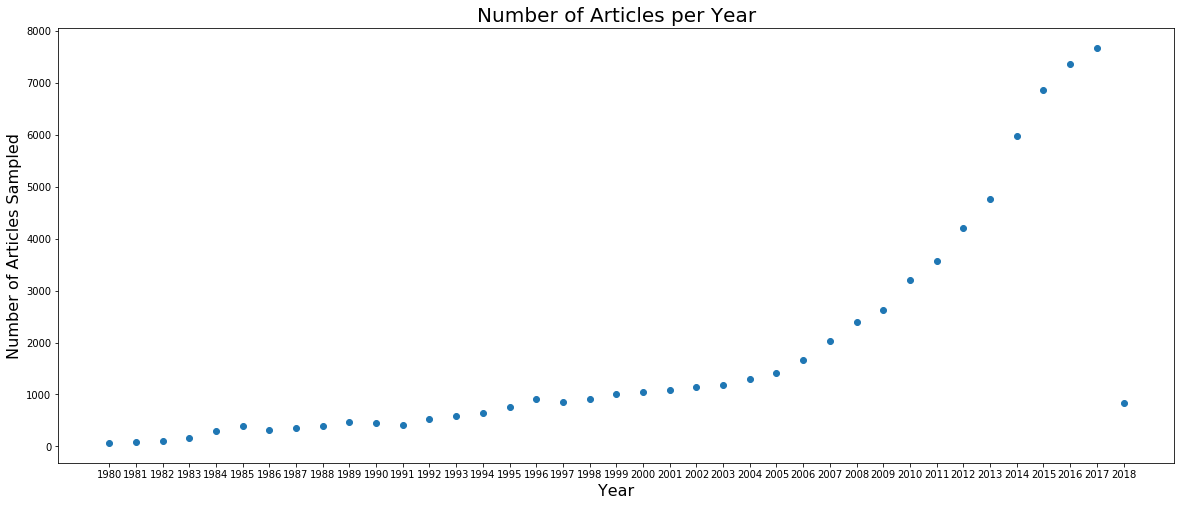

In [28]:
plt.figure(figsize = (20, 8))
plt.scatter(amounts.index, amounts)
plt.title("Number of Articles per Year", size = 20)
plt.xlabel("Year", size=16)
plt.ylabel("Number of Articles Sampled", size=16)

In [29]:

for i in range(0,len(yrlst)-5):
    years_abstracts = ' '
    for x in range(i, i + 5):
        years_abstracts.join(yrlst[i : i+5])
    print(yrlst[i] + ' - ' + yrlst[i+4])
#    print(nmf_topic_gen(grp_tfidf_tf[years_abstracts], tfidf_vectorizer_sw, 5, grp_dct[yr]))
    

1980 - 1984
1981 - 1985
1982 - 1986
1983 - 1987
1984 - 1988
1985 - 1989
1986 - 1990
1987 - 1991
1988 - 1992
1989 - 1993
1990 - 1994
1991 - 1995
1992 - 1996
1993 - 1997
1994 - 1998
1995 - 1999
1996 - 2000
1997 - 2001
1998 - 2002
1999 - 2003
2000 - 2004
2001 - 2005
2002 - 2006
2003 - 2007
2004 - 2008
2005 - 2009
2006 - 2010
2007 - 2011
2008 - 2012
2009 - 2013
2010 - 2014
2011 - 2015
2012 - 2016
2013 - 2017


# Real Modeling

In [20]:
grp_dct = {}
for year in yrlst:
    abstract_group = df_grp.get_group(year).Abstract
    grp_dct[year] = abstract_group


def vec_abs_over_yrs(vectorizer):
# Creates dict grp_vec of 'year' : 'sparse matrix of vectorized abstracts from that year'

    grp_vec= {}
    for year in yrlst:
        x = vectorizer.fit_transform(grp_dct[year])
        grp_vec[year] = x
    return grp_vec

In [21]:
with open('stop_words_eng.txt', 'r') as f:
    stop_words_eng = f.read().split()
f.close


<function TextIOWrapper.close>

In [22]:
abstracts = df_clean.Abstract

count_vectorizer = CountVectorizer(ngram_range = (0,1), stop_words = 'english')

count = count_vectorizer.fit_transform(abstracts)



In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (0,1), 
                                   stop_words = 'english', 
#                                   max_df=0.98, 
#                                   min_df=1
                                  )

tfidf = tfidf_vectorizer.fit_transform(abstracts)

In [19]:
grp_tfidf = vec_abs_over_yrs(tfidf_vectorizer)
grp_count = vec_abs_over_yrs(count_vectorizer)



In [24]:
def nmf_topic_gen(matrix, vectorizer, topic_num, papers): 
    vectorizer.fit_transform(papers)
    nmf_model = NMF(1)
    nmf_model.fit(matrix)
    n_grams = vectorizer.get_feature_names()
    for r in nmf_model.components_:
        topic_model = sorted([(v,i) for i,v in enumerate(r)])[-topic_num:]
        return [n_grams[i[1]] for i in topic_model]

# Add Stop Words from Overall Abstracts

In [20]:
def additional_stop_words(vectorizer, num_words):
    vector_matrix = vectorizer.fit_transform(abstracts)
    nmf_model = NMF(1)
    nmf_model.fit(vector_matrix)
    n_grams = vectorizer.get_feature_names() 
    for r in nmf_model.components_:
        top_matches = sorted([(v,i) for i,v in enumerate(r)])[-num_words:]
        return [n_grams[i[1]] for i in top_matches]

In [21]:
ct_sw = additional_stop_words(count_vectorizer, 150) 
tf_sw = additional_stop_words(tfidf_vectorizer, 150)

count_stopwords = stop_words_eng + ct_sw
tfidf_stopwords = stop_words_eng + tf_sw

stopwords = stop_words_eng + ct_sw + tf_sw

# Revectorize and Run

In [22]:
count_vectorizer_ct = CountVectorizer(ngram_range = (0,1), 
                                      stop_words = count_stopwords
                                     )
count_vectorizer_tf = CountVectorizer(ngram_range = (0,1), 
                                      stop_words = tfidf_stopwords
                                     )
tfidf_vectorizer_ct = TfidfVectorizer(ngram_range = (0,1), 
                                   stop_words = count_stopwords
                                     )
tfidf_vectorizer_tf = TfidfVectorizer(ngram_range = (0,1), 
                                   stop_words = tfidf_stopwords
                                     ) 

count_vectorizer_sw = CountVectorizer(ngram_range = (0,1), 
                                      stop_words = stopwords
                                     )
tfidf_vectorizer_sw = TfidfVectorizer(ngram_range = (0,1), 
                                   stop_words = stopwords
                                     ) 

In [23]:
grp_count_ct = vec_abs_over_yrs(count_vectorizer_ct)
grp_count_tf = vec_abs_over_yrs(count_vectorizer_tf)
grp_tfidf_ct = vec_abs_over_yrs(tfidf_vectorizer_ct)
grp_tfidf_tf = vec_abs_over_yrs(tfidf_vectorizer_tf)

In [25]:
def nmf_topic_words(group_vec, vectorizer, topic_num):
    for key in group_vec.keys():
        return(nmf_topic_gen(group_vec[key], vectorizer, topic_num, grp_dct[key]))


In [26]:
grps = [grp_count_ct, 
        grp_count_tf, 
        grp_tfidf_ct, 
        grp_tfidf_tf]
vecs = [count_vectorizer_ct, count_vectorizer_tf, tfidf_vectorizer_ct, tfidf_vectorizer_tf, count_vectorizer_sw, tfidf_vectorizer_sw]

In [27]:
years = yrlst

for yr in years:
    print(str(yr))
    print(nmf_topic_gen(grp_tfidf_tf[yr], tfidf_vectorizer_sw, 3, grp_dct[yr]))
    

    



1980
['combining', 'combination', 'cfuc']
1981
['cfue', 'colorectal', 'cfuc']
1982
['colonisation', 'cfuc', 'combination']
1983
['colonisation', 'assayed', 'colposcopic']
1984
['series', 'colorectal', 'assayed']
1985
['duct', 'assayable', 'column']
1986
['assayed', 'serve', 'du145']
1987
['cfus', 'toxin', 'column']
1988
['colorectal', 'cfuc', 'good']
1989
['colorectal', 'cfuc', 'golden']
1990
['cfuc', 'colorimetric', 'goblet']
1991
['colorectal', 'cfus', 'goiter']
1992
['colorectal', 'cfus', 'goitrogenesis']
1993
['cmml', 'colorectal', 'good']
1994
['cg', 'colour', 'goal']
1995
['alter', 'ddi', 'permits']
1996
['bm5', 'dcc', 'pcna']
1997
['m7', 'permeable', 'ddelta2']
1998
['dbeta2', 'perlecan', 'machinery']
1999
['medium', 'permit', 'dc']
2000
['dbds', 'dbd', 'medically']
2001
['gy', 'medications', 'granule']
2002
['granular', 'doses', 'gynecological']
2003
['dormant', 'granular', 'h1299']
2004
['dorsal', 'granule', 'gynecologic']
2005
['granular', 'trapping', 'gyri']
2006
['granular'

In [28]:

dct_yr_all = []

for yr in yrlst:
    dct_yr = {}
    dct_yr["name"] = str(yr)
    dct_yr_child =[]
    
    
    dct_topic_child = []
    for topic in nmf_topic_gen(grp_tfidf_tf[yr], tfidf_vectorizer_sw, 3, grp_dct[yr]):
        dct_topic = {}
        dct_topic["name"] = topic
        dct_topic["size"] = 800
        dct_topic_child.append(dct_topic)
#    dct_topic_child.append({"name" : yr, "size" : 800})
    dct_yr["children"] = dct_topic_child
    
    dct_yr_all.append(dct_yr)
    
jsondct = {"name" : "Cancer Stem Cell",
           "children" : dct_yr_all}


In [29]:
import json
import pprint
#with open('jsondct.json', 'wb') as f:

pprint.pprint(json.dumps(jsondct, separators = (',', ':')))



('{"name":"Cancer Stem '
 'Cell","children":[{"name":"1980","children":[{"name":"combining","size":800},{"name":"combination","size":800},{"name":"cfuc","size":800}]},{"name":"1981","children":[{"name":"cfue","size":800},{"name":"colorectal","size":800},{"name":"cfuc","size":800}]},{"name":"1982","children":[{"name":"colonisation","size":800},{"name":"cfuc","size":800},{"name":"combination","size":800}]},{"name":"1983","children":[{"name":"colonisation","size":800},{"name":"assayed","size":800},{"name":"colposcopic","size":800}]},{"name":"1984","children":[{"name":"series","size":800},{"name":"colorectal","size":800},{"name":"assayed","size":800}]},{"name":"1985","children":[{"name":"duct","size":800},{"name":"assayable","size":800},{"name":"column","size":800}]},{"name":"1986","children":[{"name":"assayed","size":800},{"name":"serve","size":800},{"name":"du145","size":800}]},{"name":"1987","children":[{"name":"cfus","size":800},{"name":"toxin","size":800},{"name":"column","size":800}]